# Michael Nguyen

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install nltk

In [3]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import matplotlib.pyplot as plt

In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/micha/applied text mining/mod 1/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [6]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens else 0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [7]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in your code because it allows you to set conditions that has to be met before the code can be ran. The assertions is also a form of documentation that specifys that the code assumes to be true at specific points in the program. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [8]:
# Read in the lyrics data
artists = ["cher", "robyn"]
lyrics_data = {artist: {song: open(os.path.join(data_location, lyrics_folder, artist, song), 'r').read().strip() 
                        for song in os.listdir(os.path.join(data_location, lyrics_folder, artist))} 
               for artist in artists}

In [9]:
# Read in the twitter data
twitter_data = {key: open(os.path.join(data_location, twitter_folder, f"{key}.txt"), 'r', encoding='utf-8').readlines() 
    for key in ["cher_followers", "cher_followers_data", "robynkonichiwa_followers", "robynkonichiwa_followers_data"]}


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [10]:
punctuation = set(punctuation) # speeds up comparison

In [11]:
# create your clean twitter data here
def clean_and_tokenize(text):
    return [token for token in re.split('\W+', text.lower()) if token not in sw and token not in punctuation]

twitter_data_keys = ["cher_followers", "cher_followers_data", "robynkochiwa_followers", "robynkochiwa_followers_data"]

In [12]:
# create your clean lyrics data here
clean_lyrics_data = {artist: {song: clean_and_tokenize(lyrics) for song, lyrics in lyrics_data[artist].items()} for artist in ["cher", "robyn"]}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [13]:
# calls to descriptive_stats here
lyrics_artists = ["cher", "robyn"]
twitter_artists = ["cher_followers_data", "robynkonichiwa_followers_data"]

print("Processing Lyrics data:\n")
for artist in lyrics_artists:
    print(f"\nArtist: {artist}\n")
    for song, lyrics in clean_lyrics_data[artist].items():
        descriptive_stats(lyrics)

print("Processing Twitter data:\n")
for artist in twitter_artists:
    print(f"\nArtist: {artist}\n")
    descriptive_stats(twitter_data[artist])


Processing Lyrics data:


Artist: cher

There are 171 tokens in the data.
There are 80 unique tokens in the data.
There are 797 characters in the data.
The lexical diversity is 0.468 in the data.
There are 136 tokens in the data.
There are 40 unique tokens in the data.
There are 685 characters in the data.
The lexical diversity is 0.294 in the data.
There are 110 tokens in the data.
There are 57 unique tokens in the data.
There are 556 characters in the data.
The lexical diversity is 0.518 in the data.
There are 30 tokens in the data.
There are 26 unique tokens in the data.
There are 124 characters in the data.
The lexical diversity is 0.867 in the data.
There are 62 tokens in the data.
There are 43 unique tokens in the data.
There are 297 characters in the data.
The lexical diversity is 0.694 in the data.
There are 97 tokens in the data.
There are 65 unique tokens in the data.
There are 451 characters in the data.
The lexical diversity is 0.670 in the data.
There are 86 tokens in the 

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The "top 5 words" would be "the", "is", "and", "of" and "to" if we left stopwords in the data.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior beliefs is that since I haven't heard of these two artist before, I believed that there wouldn't be mch of a difference. The two artist have a big repertoire of songs so this must mean that many different vocabulary that is used. Contrary to that however, the results proved that cher has a more diverse lexical diversity than Robyn does. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [14]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

In [15]:
#emojis
def extract_emojis(text):
    return [ch for ch in text if emoji.is_emoji(ch)]

#hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

#song title
def get_song_title(text):
    return text.split('\n')[0]

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [27]:
# Your code here
import emoji
from collections import Counter

def extract_emojis(text):
    return [ch for ch in text if emoji.emoji_count(ch) > 0]

for artist in ['cher_followers_data', 'robynkonichiwa_followers_data']:
    all_descriptions = ' '.join(twitter_data[artist]) 
    emojis = Counter(extract_emojis(all_descriptions))  
    print(f"Top 10 emojis for {artist}: {emojis.most_common(10)}\n")

Top 10 emojis for cher_followers_data: [('❤', 94506), ('🌈', 66291), ('♥', 48059), ('🏳', 47174), ('✨', 45846), ('🌊', 31234), ('💙', 31050), ('🏻', 25195), ('✌', 21963), ('💜', 21571)]

Top 10 emojis for robynkonichiwa_followers_data: [('🌈', 6086), ('❤', 5635), ('🏳', 4641), ('♥', 4249), ('✨', 3217), ('🏻', 1751), ('✌', 1495), ('♀', 1347), ('🏼', 1340), ('💙', 1200)]



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [28]:
# Your code here
for artist in ['cher_followers_data', 'robynkonichiwa_followers_data']:
    hashtags = Counter([hashtag for desc in twitter_data[artist] for hashtag in extract_hashtags(desc)])
    print(f"Top 10 hashtags for {artist}: {hashtags.most_common(10)}\n")

Top 10 hashtags for cher_followers_data: [('BLM', 10100), ('Resist', 6161), ('BlackLivesMatter', 4888), ('resist', 3860), ('FBR', 3330), ('1', 3111), ('TheResistance', 3044), ('blacklivesmatter', 2738), ('Resistance', 1953), ('RESIST', 1878)]

Top 10 hashtags for robynkonichiwa_followers_data: [('BlackLivesMatter', 356), ('BLM', 345), ('1', 228), ('blacklivesmatter', 222), ('music', 175), ('Music', 114), ('EDM', 87), ('LGBTQ', 76), ('blm', 60), ('TeamFollowBack', 59)]



### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [29]:
# Your code here
for artist in ['cher', 'robyn']:
    song_titles = lyrics_data[artist].keys()
    common_words = Counter([word for title in song_titles for word in clean_and_tokenize(title)])
    print(f"Top 5 common words in song titles for {artist}: {common_words.most_common(5)}\n")

Top 5 common words in song titles for cher: [('txt', 316), ('cher_88degrees', 1), ('cher_adifferentkindoflovesong', 1), ('cher_afterall', 1), ('cher_again', 1)]

Top 5 common words in song titles for robyn: [('txt', 104), ('robyn_88days', 1), ('robyn_aintnothing', 1), ('robyn_anytimeyoulike', 1), ('robyn_babyforgiveme', 1)]



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

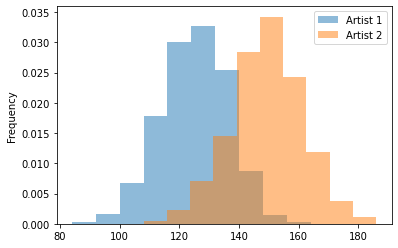

In [33]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))

                  })

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The reular expression '\s+' is used to match on any form of whitespace character.


In [31]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

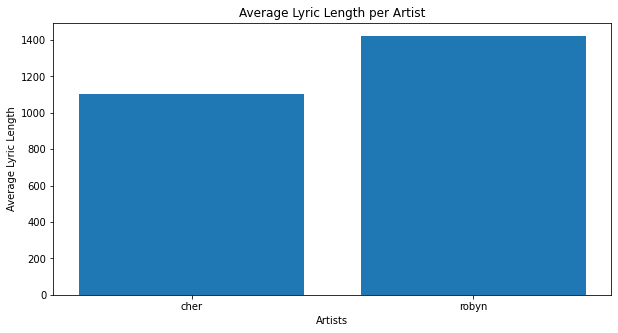

In [35]:
# Your lyric length comparison chart here. 
average_lyric_lengths = {artist: sum(len(lyrics) for lyrics in lyrics_data[artist].values()) / len(lyrics_data[artist])
    for artist in ['cher', 'robyn']}

plt.figure(figsize=(10,5))
plt.bar(average_lyric_lengths.keys(), average_lyric_lengths.values())
plt.title("Average Lyric Length per Artist")
plt.xlabel("Artists")
plt.ylabel("Average Lyric Length")
plt.show()